**Load the data set + import the libraries** 

In [51]:
from sklearn.datasets import fetch_california_housing
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras import Sequential , models , layers 

**Preprocessing and cleaning**

In [2]:
data = fetch_california_housing()
x , y  = data.data , data.target 

**Convert to dataframe first**

In [3]:
df = pd.DataFrame(x , columns= data.feature_names)
df['MedhouseVal'] = y
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedhouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedhouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedhouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**cleaning includes:**
* nulls 
* duplicates
* outliers 


In [6]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedhouseVal    0
dtype: int64

In [7]:
df.duplicated().sum()

0

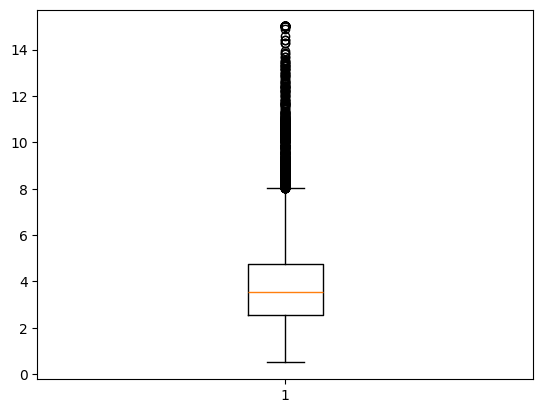

In [8]:
import seaborn as sns
q1 = df['MedInc'].quantile(0.25)
q3 = df['MedInc'].quantile(0.75)
IQR = q3-q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR
outliers = df[(df['MedInc'] > upper) | (df['MedInc'] < lower)]
plt.boxplot(df['MedInc'])
plt.show()

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedhouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
outliers_columns = ['AveBedrms' , 'Population' , 'AveRooms' ,'AveOccup']
for i in outliers_columns:
   q1 = df[i].quantile(0.25)
   q3 = df[i].quantile(0.75)
   IQR = q3-q1
   lower = q1 - 1.5 * IQR
   upper = q3 + 1.5 * IQR
   df = df[(df[i] >= lower) & (df[i] <= upper)] #important note !! 
   #discovered that each time i run the loop the outliers deacrease so i run it multiple times untill 
   #until there are almost no outliers 

{'whiskers': [<matplotlib.lines.Line2D at 0x21a0e60d8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x21a0e60de20>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a0e60d790>],
 'medians': [<matplotlib.lines.Line2D at 0x21a0e60e360>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a0e60e660>],
 'means': []}

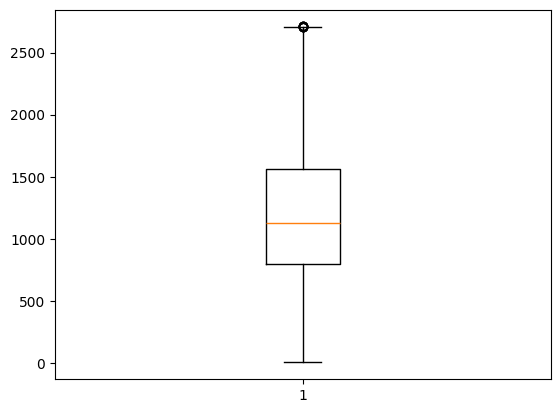

In [25]:
plt.boxplot(df['Population'])

In [30]:
print (f'total number of samples : {df.shape}')

total number of samples : (16234, 9)


**Splitting into training and testing**

In [31]:
from sklearn.model_selection import train_test_split

#convert the data back to split it into x and y
x = df.iloc[: , :-1] #get all cols except the target one
y = df.iloc[: , -1]# get the target col

x_train , x_test ,y_train , y_test = train_test_split(x , y , test_size= 0.33 , random_state=42)



In [32]:
print (f'the x train number of samples : {x_train.shape}')
print (f'the y train number of samples : {y_train.shape}')
print (f'the y test number of samples : {y_test.shape}')
print (f'the x test number of samples : {x_test.shape}')

the x train number of samples : (10876, 8)
the y train number of samples : (10876,)
the y test number of samples : (5358,)
the x test number of samples : (5358, 8)


**Make the struction of the model**

In [ ]:
#it doesn't need a flatten or something 
#i tried with the number of neurons = 5 and 3 but the loss was too big so i tried to increase the neurons 
model = keras.models.Sequential([
    keras.layers.Dense(18 , activation='relu' ),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1)
    ])

**Compile the model**

In [ ]:
# to compile the model we need to determine the kind of loss , optimizer , validation , metric 
#the metric doesn't affect the training but the loss does 
#because of the dataset is about predicting prices so the loss -> mse (continous values)
losses = keras.losses.MeanSquaredError()
optim = keras.optimizers.Adam(learning_rate=0.01)
metric = ['mse']

model.compile(
    loss = losses ,
    optimizer = optim,
    metrics = metric
)


**Scaling the data before training**

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
#NOTE :
#when i used scaling the loss graph seems abit curved 
#and when i didn't use scaling the graph was like a dereased line then stopped decreasing
#and this is beceuase the range and distribution of values has changed 

**Train the model**

In [54]:
#for training the model we need to determine the batch size and the number of epochs 
#for monitoring we need metric and it doesn't affect the training 
#not like the loss it is used for optimizing 
batch_size = 64
no_epoches = 10
history = model.fit(x_train_scaled , y_train , epochs=no_epoches , batch_size= batch_size , verbose=2 , shuffle=True)

Epoch 1/10
170/170 - 0s - 1ms/step - loss: 0.6663 - mse: 0.6663
Epoch 2/10
170/170 - 0s - 2ms/step - loss: 0.3795 - mse: 0.3795
Epoch 3/10
170/170 - 0s - 2ms/step - loss: 0.3709 - mse: 0.3709
Epoch 4/10
170/170 - 0s - 1ms/step - loss: 0.3637 - mse: 0.3637
Epoch 5/10
170/170 - 0s - 1ms/step - loss: 0.3573 - mse: 0.3573
Epoch 6/10
170/170 - 0s - 1ms/step - loss: 0.3522 - mse: 0.3522
Epoch 7/10
170/170 - 0s - 2ms/step - loss: 0.3480 - mse: 0.3480
Epoch 8/10
170/170 - 0s - 2ms/step - loss: 0.3444 - mse: 0.3444
Epoch 9/10
170/170 - 0s - 1ms/step - loss: 0.3422 - mse: 0.3422
Epoch 10/10
170/170 - 0s - 1ms/step - loss: 0.3409 - mse: 0.3409


**plot the training progress**

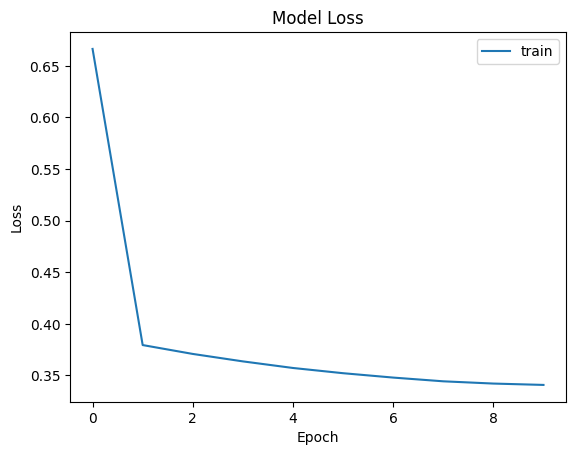

In [55]:
#also we can use model.summary() to get the summary
'''
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: ${test_mae*100000:.2f}")  # MAE in dollars (scaled back)
'''

# to extarct the training losses we need the history of the model 
train_losses = history.history['loss']

plt.plot(train_losses, label='train')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


**Evaluate the model**

In [56]:
# to start evaluating the model we use model.evaluate 
model.evaluate (x_test_scaled, y_test ,batch_size= batch_size , verbose = 2 )

84/84 - 0s - 1ms/step - loss: 0.3433 - mse: 0.3433


[0.34325915575027466, 0.34325915575027466]